In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [34]:
file_path = "cardio_train.csv"

df = pd.read_csv(file_path, delimiter=';')
df.shape

(70000, 13)


1. Age | Objective Feature | age | int (days)
2. Height | Objective Feature | height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | categorical code |
5. Systolic blood pressure | Examination Feature | ap_hi | int |
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


In [35]:
df.head(20)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [36]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [37]:
df['gluc'].unique()

array([1, 2, 3], dtype=int64)

In [38]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


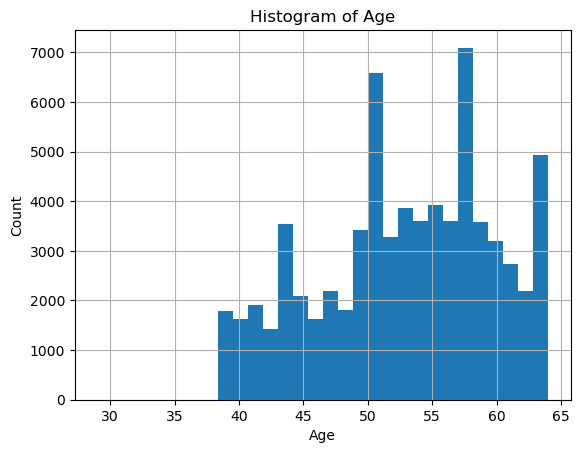

In [39]:
## 나이의 분포

# 나이를 연령대로 변환 (단위: 년)
df['age_years'] = (df['age'] / 365).astype(int)
df['age_years'].hist(bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age')
plt.show()

In [40]:
# 나이별 심혈관 질환 발생 비율 계산
age_cardio_ratio = df.groupby('age_years')['cardio'].mean()
age_cardio_ratio

age_years
29    0.000000
30    0.000000
39    0.242697
40    0.214550
41    0.296374
42    0.299013
43    0.366322
44    0.359313
45    0.407762
46    0.393231
47    0.482021
48    0.456102
49    0.424056
50    0.388060
51    0.472981
52    0.463861
53    0.504137
54    0.485437
55    0.553094
56    0.535348
57    0.567553
58    0.557055
59    0.614933
60    0.583750
61    0.680718
62    0.670759
63    0.728436
64    0.709191
Name: cardio, dtype: float64

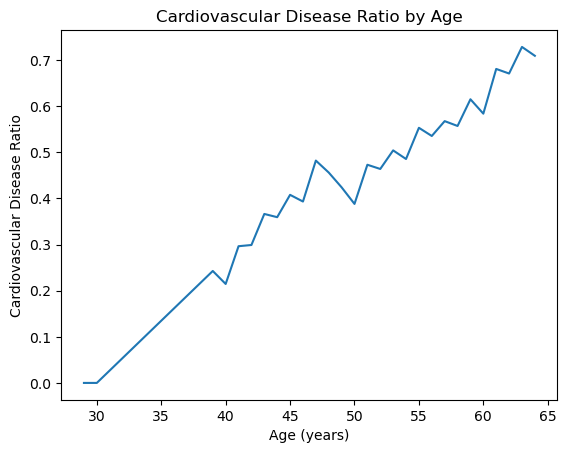

In [41]:
# 시각화: 나이에 따른 심혈관 질환 발생 비율
plt.plot(age_cardio_ratio.index, age_cardio_ratio.values)
plt.xlabel('Age (years)')
plt.ylabel('Cardiovascular Disease Ratio')
plt.title('Cardiovascular Disease Ratio by Age')
plt.show()

In [42]:
# 성별에 따른 심혈관 질환 발생 비율 계산
gender_cardio_ratio = df.groupby('gender')['cardio'].mean()

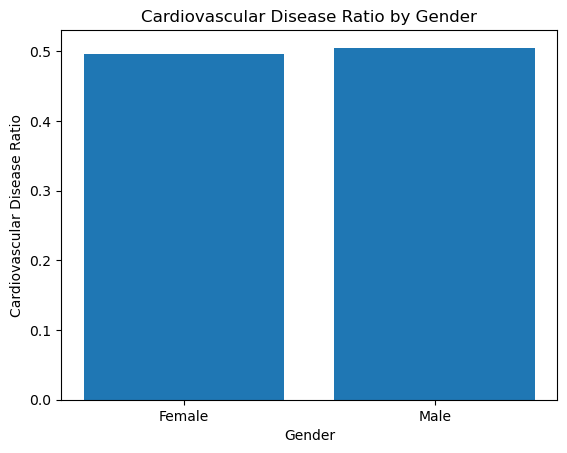

In [43]:
# 시각화: 성별에 따른 심혈관 질환 발생 비율
gender_labels = ['Female', 'Male']
plt.bar(gender_labels, gender_cardio_ratio)
plt.xlabel('Gender')
plt.ylabel('Cardiovascular Disease Ratio')
plt.title('Cardiovascular Disease Ratio by Gender')
plt.show()

In [44]:
# 혈당 수치별 심혈관 질환 발생 비율 계산
glucose_cardio_ratio = df.groupby('gluc')['cardio'].mean()
glucose_cardio_ratio

gluc
1    0.480590
2    0.593064
3    0.622022
Name: cardio, dtype: float64

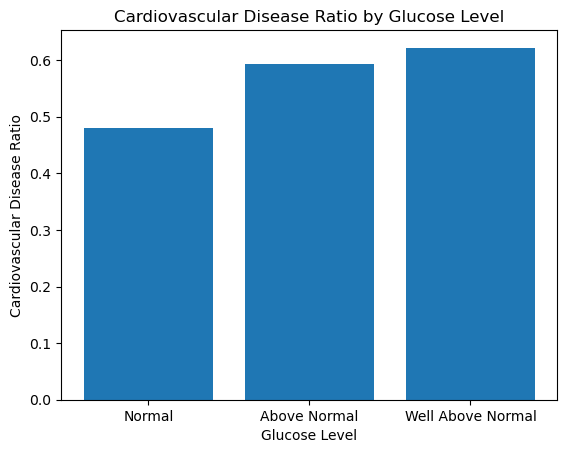

In [45]:
# 시각화: 혈당 수치에 따른 심혈관 질환 발생 비율
glucose_labels = ['Normal', 'Above Normal', 'Well Above Normal']
plt.bar(glucose_labels, glucose_cardio_ratio)
plt.xlabel('Glucose Level')
plt.ylabel('Cardiovascular Disease Ratio')
plt.title('Cardiovascular Disease Ratio by Glucose Level')
plt.show()

In [46]:
weight_cardio_ratio = df.groupby('weight')['cardio'].mean()

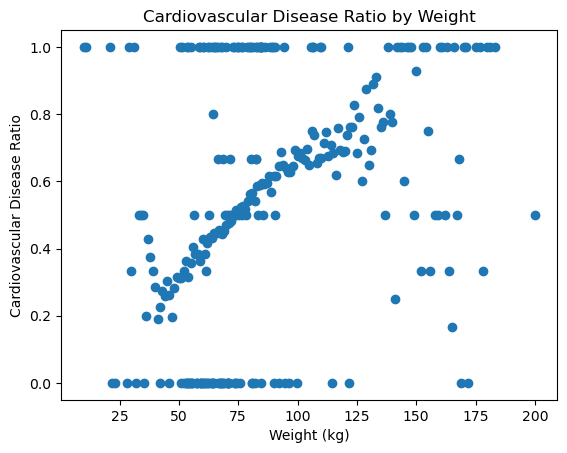

In [47]:
plt.scatter(weight_cardio_ratio.index, weight_cardio_ratio.values)
plt.xlabel('Weight (kg)')
plt.ylabel('Cardiovascular Disease Ratio')
plt.title('Cardiovascular Disease Ratio by Weight')
plt.show()

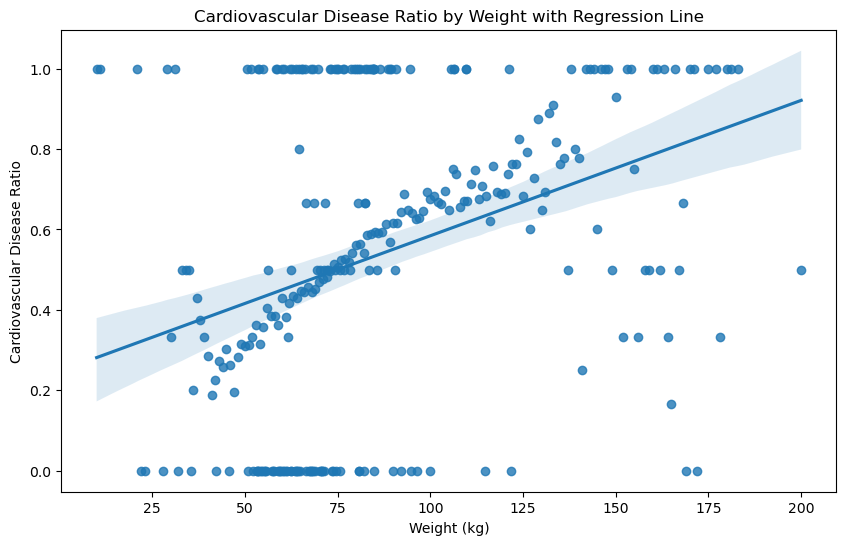

In [48]:
plt.figure(figsize=(10, 6))
sns.regplot(x=weight_cardio_ratio.index, y=weight_cardio_ratio.values)
plt.xlabel('Weight (kg)')
plt.ylabel('Cardiovascular Disease Ratio')
plt.title('Cardiovascular Disease Ratio by Weight with Regression Line')
plt.show()

In [49]:
cholesterol_cardio_ratio = df.groupby('cholesterol')['cardio'].mean()

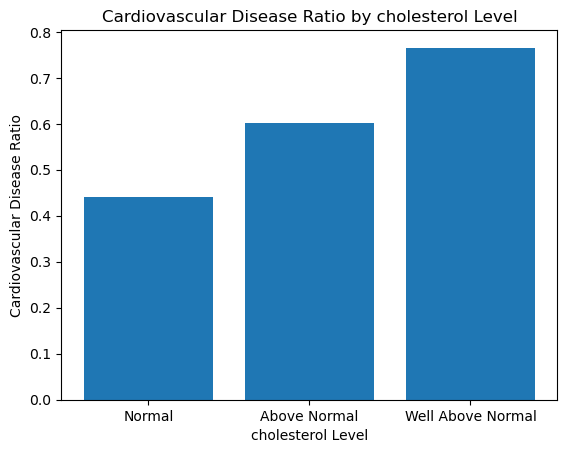

In [51]:
cholesterol_labels = ['Normal', 'Above Normal', 'Well Above Normal']
plt.bar(cholesterol_labels, cholesterol_cardio_ratio)
plt.xlabel('cholesterol Level')
plt.ylabel('Cardiovascular Disease Ratio')
plt.title('Cardiovascular Disease Ratio by cholesterol Level')
plt.show()